In [27]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import os   
import random
import math
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from faker import Faker

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Titanic disaster

#### I am training a model to predict which passengers survived the Titanic disaster using a dataset called "train.csv." This dataset includes information on passengers and indicates whether they survived. Once the model is trained, I will use it to predict survival outcomes for another dataset, "test.csv." The "test.csv" dataset contains data on 418 additional passengers, but it does not include information on whether they survived. My model will analyze the patterns identified in the "train.csv" data to predict the survival status of these 418 passengers.

In [28]:
train = pd.read_csv('\\Users\\Andrea\\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
test = pd.read_csv('\\Users\\Andrea\\test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
for col in train.columns:
    null = train[col].isnull().sum()
    print(col,null)

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [36]:
column_mean = train['Age'].mean() 
train['Age'].fillna(column_mean, inplace=True)

In [37]:
for col in train.columns:
    null = train[col].isnull().sum()
    print(col,null)

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [7]:
df_numerized = train

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,-1,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,-1,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,-1,2


### Correlation of the variables

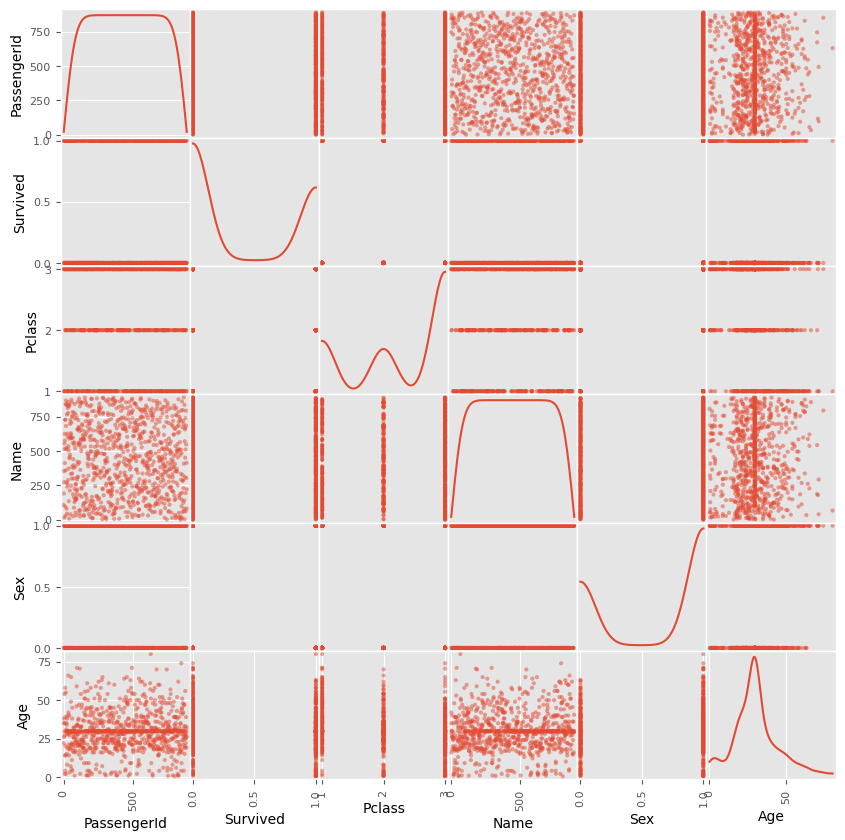

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(train.iloc[:,0:6], # Make a scatter matrix of 6 columns
               figsize=(10, 10),   # Set plot size
               diagonal='kde');    # Show distribution estimates on diagonal

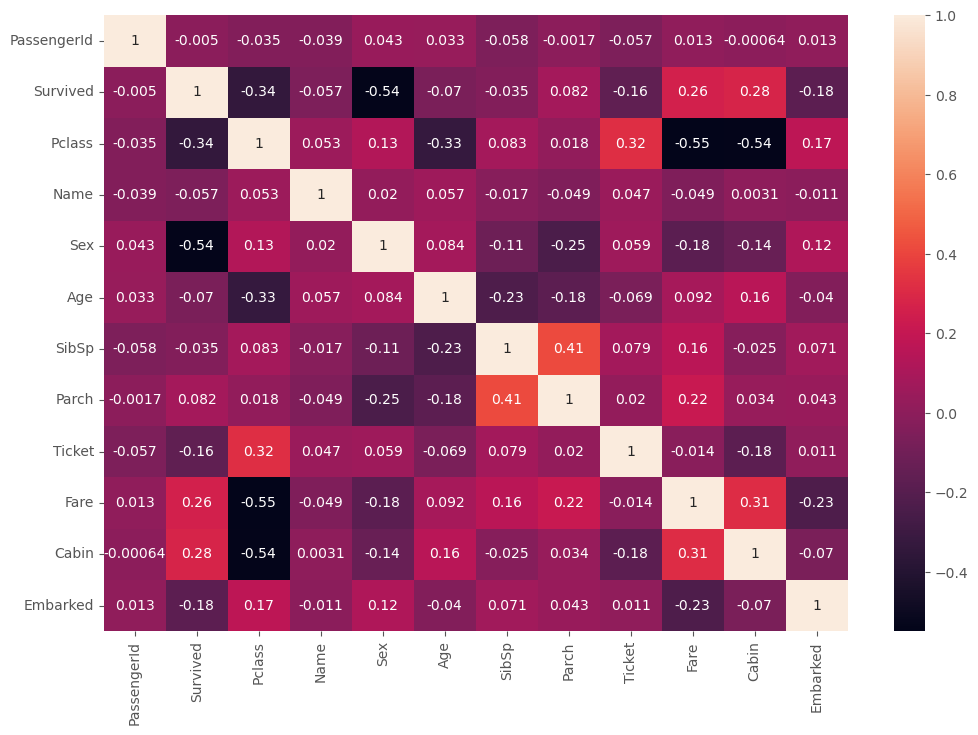

In [9]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Decision trees

In [12]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert variable to numeric
encoded_sex = label_encoder.fit_transform(train["Sex"])

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame(encoded_sex), 
               y = train["Survived"])

DecisionTreeClassifier()

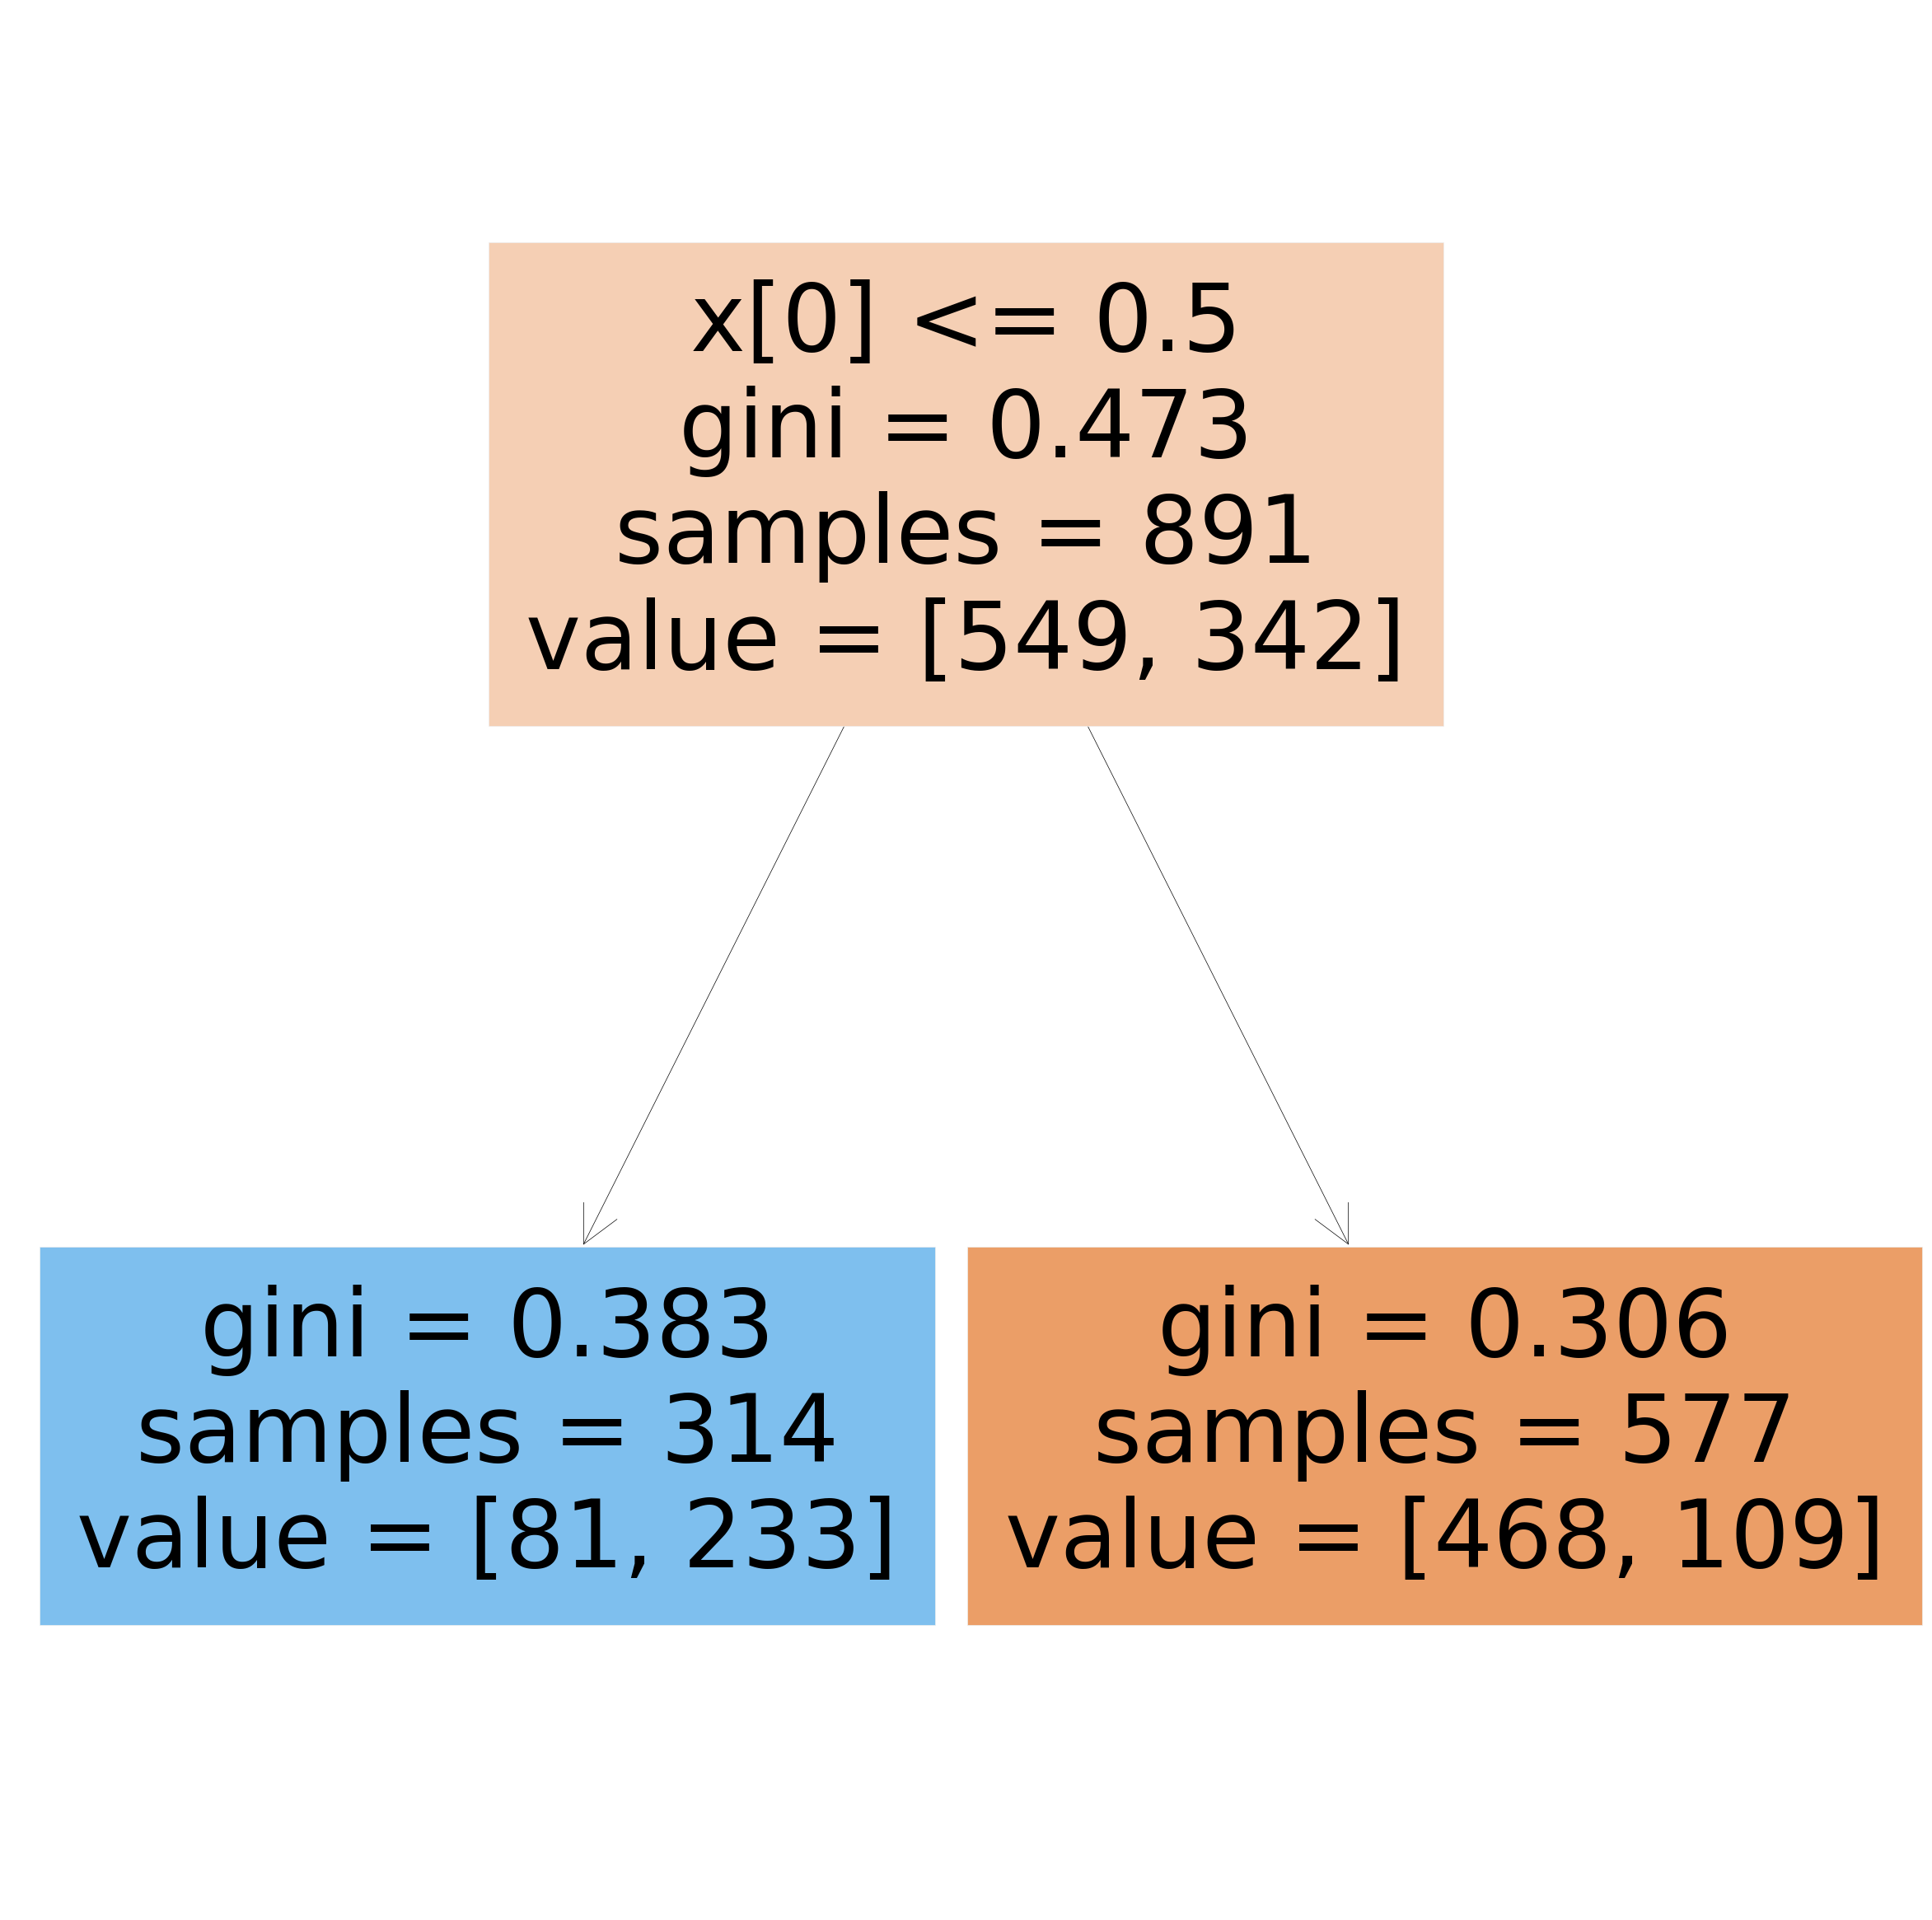

In [13]:
# Save tree as dot file
fig =plt.figure(figsize=(30,30))
plot = tree.plot_tree(tree_model , filled=True)

In [14]:
# Get survival probability
preds = tree_model.predict_proba(X = pd.DataFrame(encoded_sex))

pd.crosstab(preds[:,0], train["Sex"])

Sex,female,male
row_0,,
0.257962,314,0
0.811092,0,577


In [43]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert variable to numeric
encoded_sex = label_encoder.fit_transform(train["Sex"])
encoded_class = label_encoder.fit_transform(train["Pclass"])

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame([encoded_sex,encoded_class]).T, 
               y = train["Survived"])

DecisionTreeClassifier()

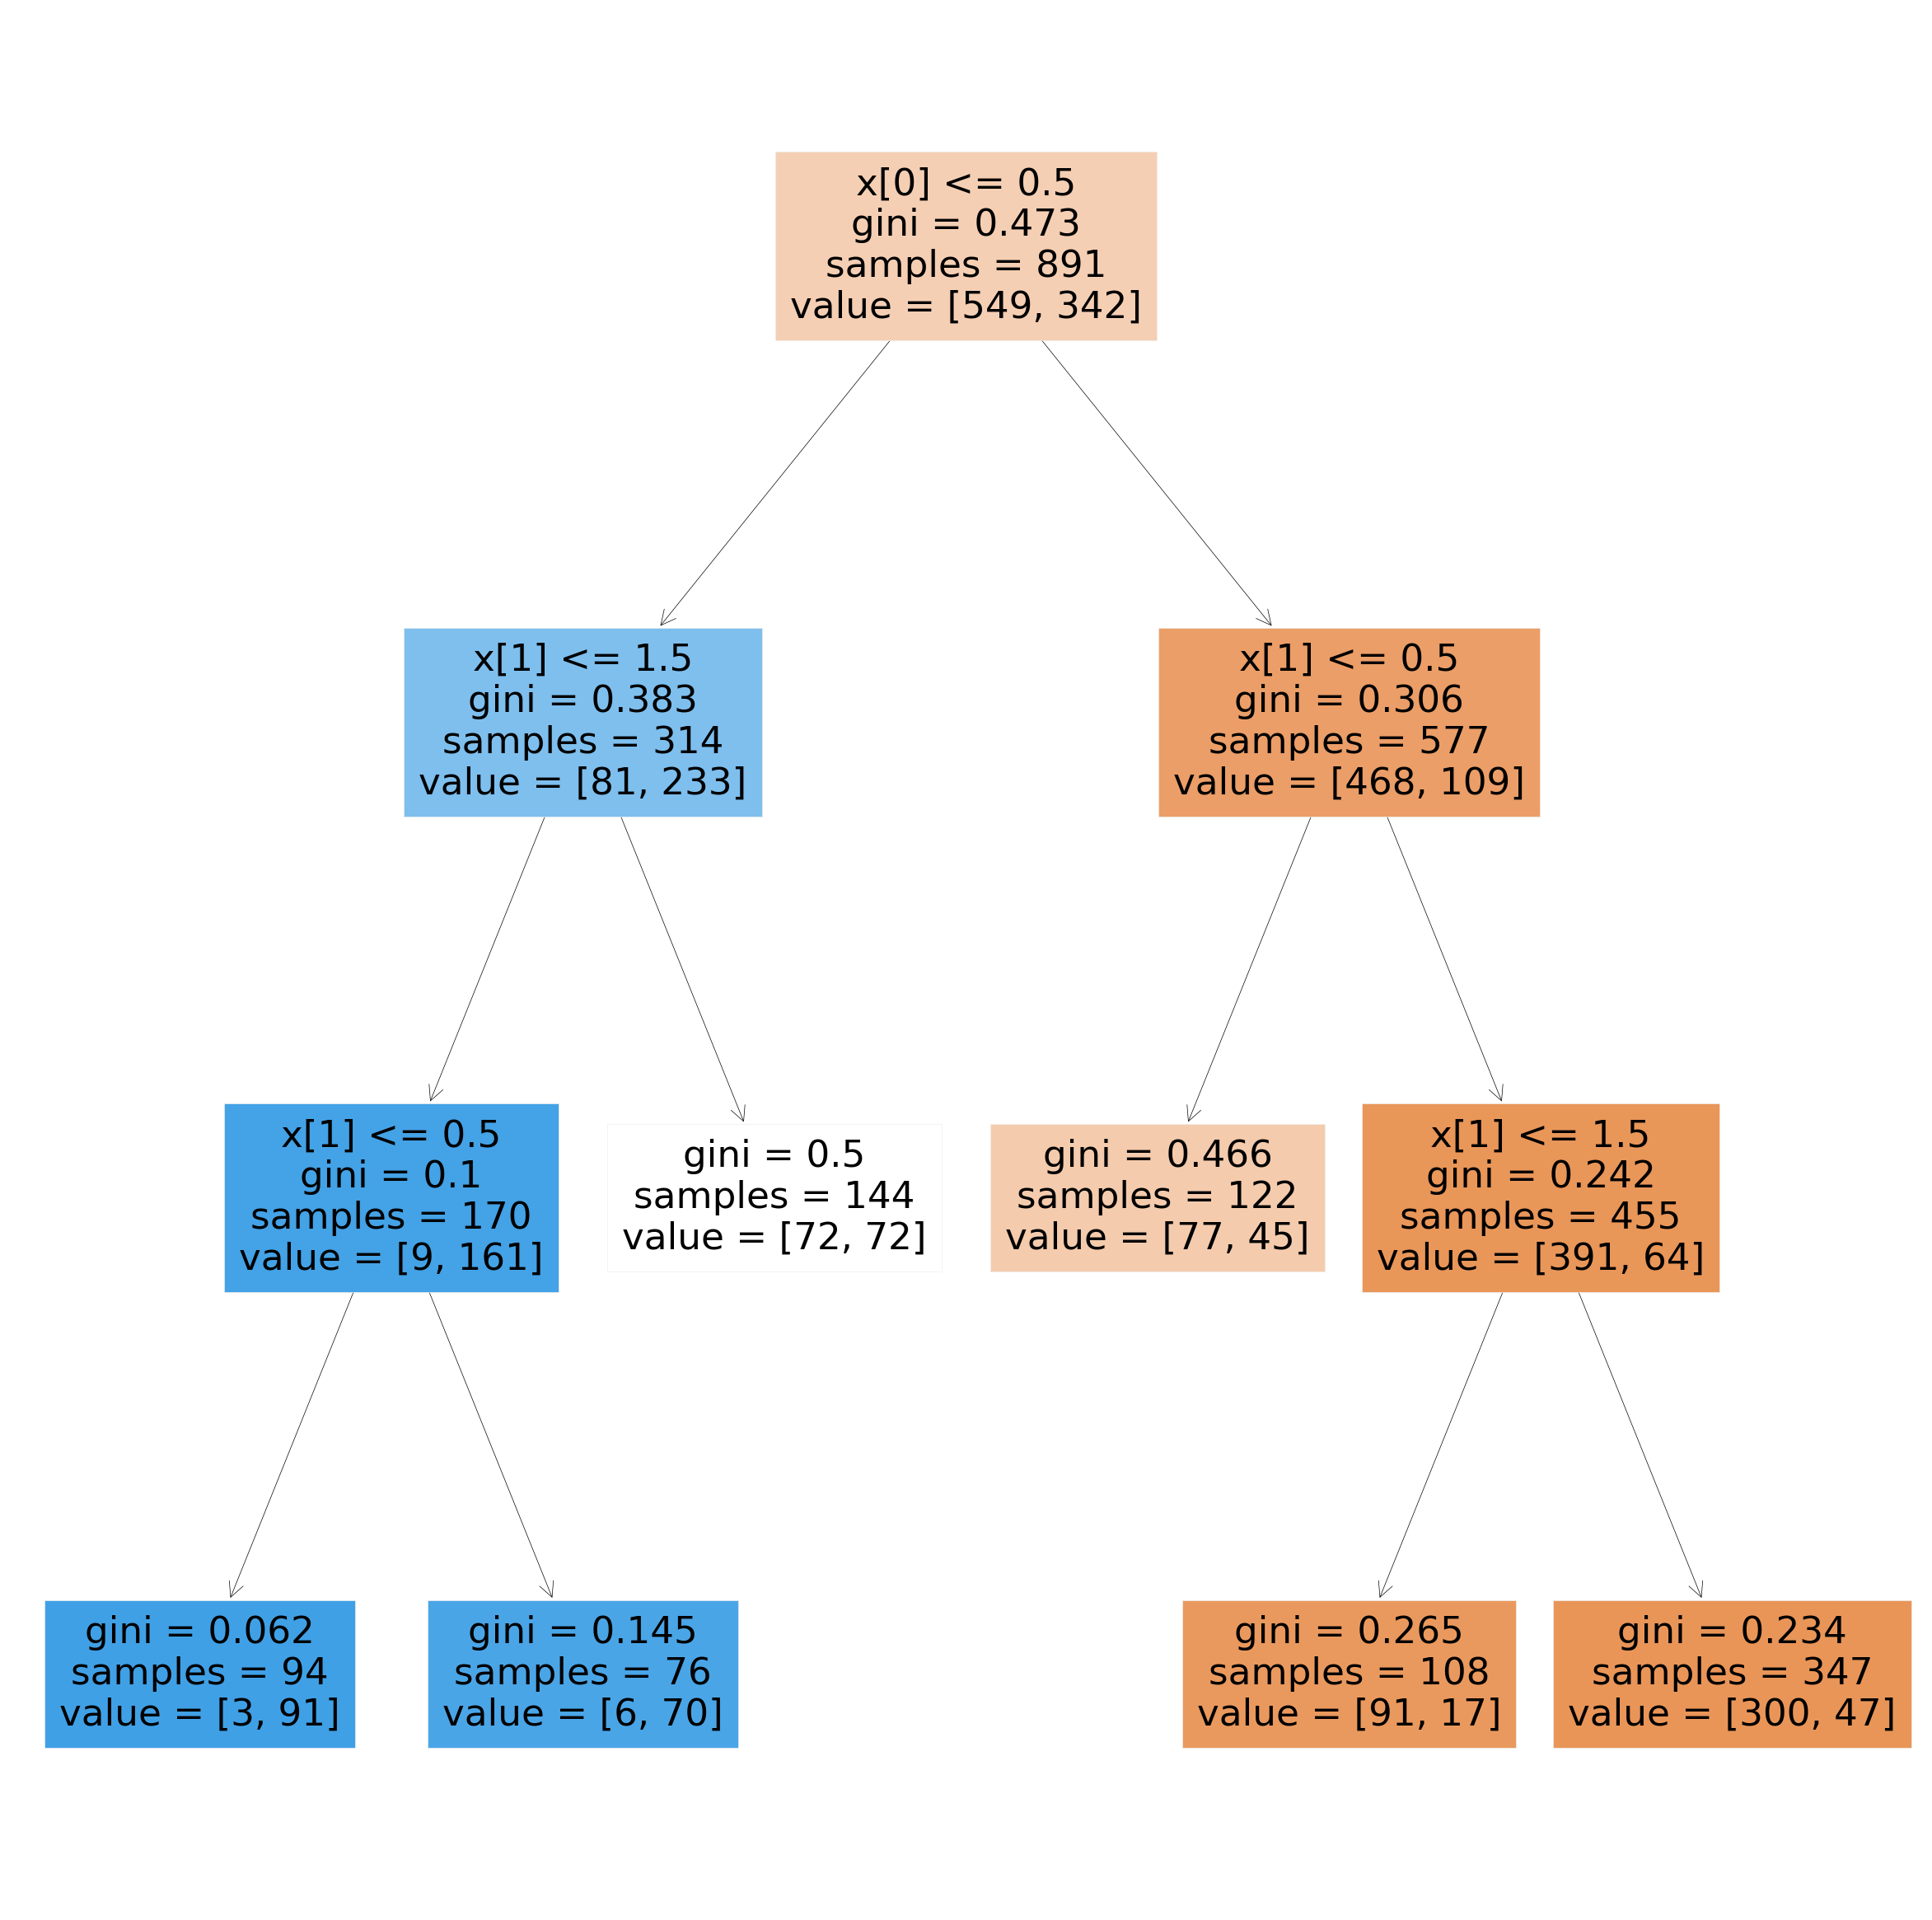

In [44]:
# Save tree as dot file
fig =plt.figure(figsize=(30,30))
plot = tree.plot_tree(tree_model , filled=True)

In [45]:
predictors = pd.DataFrame([encoded_sex,encoded_class]).T
# Get probability
preds = tree_model.predict_proba(X = predictors)

# Create a table of predictions
pd.crosstab(preds[:,0], columns = [train["Sex"], 
                                   train["Pclass"]])

Sex        0             1          
Pclass     1   2    3    1    2    3
row_0                               
0.031915  94   0    0    0    0    0
0.078947   0  76    0    0    0    0
0.500000   0   0  144    0    0    0
0.631148   0   0    0  122    0    0
0.842593   0   0    0    0  108    0
0.864553   0   0    0    0    0  347

## Results 

In [46]:
tree_model.score(X = predictors, 
                 y = train["Survived"])

0.7867564534231201

In [47]:
column_mean = test['Age'].mean() 
test['Age'].fillna(column_mean, inplace=True)

In [48]:
test["Sex"] = label_encoder.fit_transform(test["Sex"])

In [49]:
features = ["Sex","Pclass","Age"]

# Make test set predictions
preds = rf_model.predict(X = test[features])

# Create a dataframe
survived_prediction = pd.DataFrame({"PassengerId":test["PassengerId"],
                           "Survived":preds})

In [50]:
survived_prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Random forest

In [51]:
# Set the seed
np.random.seed(12)

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert some variables to numeric
train["Sex"] = label_encoder.fit_transform(train["Sex"])

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=1000, # Number of trees
                                  max_features=2,    # Num features considered
                                  oob_score=True)    # Use OOB scoring*

features = ["Sex","Pclass","Age"]

# Train the model
rf_model.fit(X=train[features],
             y=train["Survived"])

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [52]:
print("OOB accuracy: ")
print(rf_model.oob_score_)

OOB accuracy: 
0.8125701459034792


In [53]:
# Check the feature importance for our random forest model
for feature, imp in zip(features, rf_model.feature_importances_):
    print(feature, imp)

Sex 0.4079873257464321
Pclass 0.16836407864913983
Age 0.4236485956044281


## Results

In [54]:
# Make test set predictions
preds = rf_model.predict(X = test[features])

# Create a dataframe
survived_prediction = pd.DataFrame({"PassengerId":test["PassengerId"],
                           "Survived":preds})

In [55]:
survived_prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
